## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv("./data/QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [33]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [34]:
df.tail()

,DATE,TAG,POSTS
2561,2023-12-01 00:00:00,php,1259
2562,2023-12-01 00:00:00,python,7336
2563,2023-12-01 00:00:00,r,1633
2564,2023-12-01 00:00:00,ruby,158
2565,2023-12-01 00:00:00,swift,772


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2566, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [35]:
df.count()

DATE     2566
TAG      2566
POSTS    2566
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [57]:
df.groupby("TAG").sum("POSTS").sort_values(by=["POSTS"], ascending=False)

,POSTS
TAG,
javascript,2518234
python,2173772
java,1910850
c#,1608316
php,1461720
c++,802624
r,501240
c,401756
swift,331582


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [58]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,185,185
c,185,185
c#,186,186
c++,185,185
delphi,185,185
go,170,170
java,185,185
javascript,185,185
perl,185,185


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [66]:
df["DATE"] = pd.to_datetime(df["DATE"])

## Data Manipulation



In [71]:
pivoted_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
pivoted_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,143.0,859.0,3650.0,1668.0,106.0,492.0,3824.0,6762.0,49.0,1765.0,10227.0,2358.0,201.0,971.0
2023-09-01,157.0,873.0,3054.0,1492.0,105.0,424.0,3333.0,5707.0,61.0,1667.0,8626.0,2038.0,192.0,863.0
2023-10-01,175.0,977.0,3207.0,1724.0,165.0,423.0,3449.0,5509.0,53.0,1547.0,9058.0,2067.0,196.0,905.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [74]:
pivoted_df.shape

(186, 14)

In [75]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [76]:
pivoted_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,475.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1730.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [78]:
pivoted_df.count()

TAG
assembly      185
c             185
c#            186
c++           185
delphi        185
go            170
java          185
javascript    185
perl          185
php           185
python        185
r             183
ruby          185
swift         177
dtype: int64

In [79]:
pivoted_df.fillna(0, inplace=True) # Replace every NaN value with 0

In [82]:
pivoted_df.isna().values.any() # Check if there is any NaN value in DataFrame

False

In [83]:
pivoted_df.count() # Count the number of entries. After fillna(), they should be the same.

TAG
assembly      186
c             186
c#            186
c++           186
delphi        186
go            186
java          186
javascript    186
perl          186
php           186
python        186
r             186
ruby          186
swift         186
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

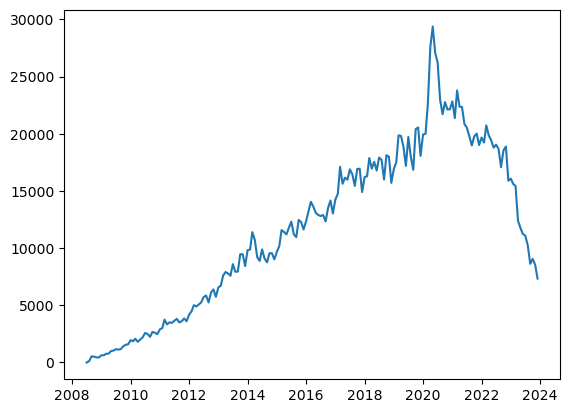

In [104]:
plt.plot(pivoted_df.index, pivoted_df.python)

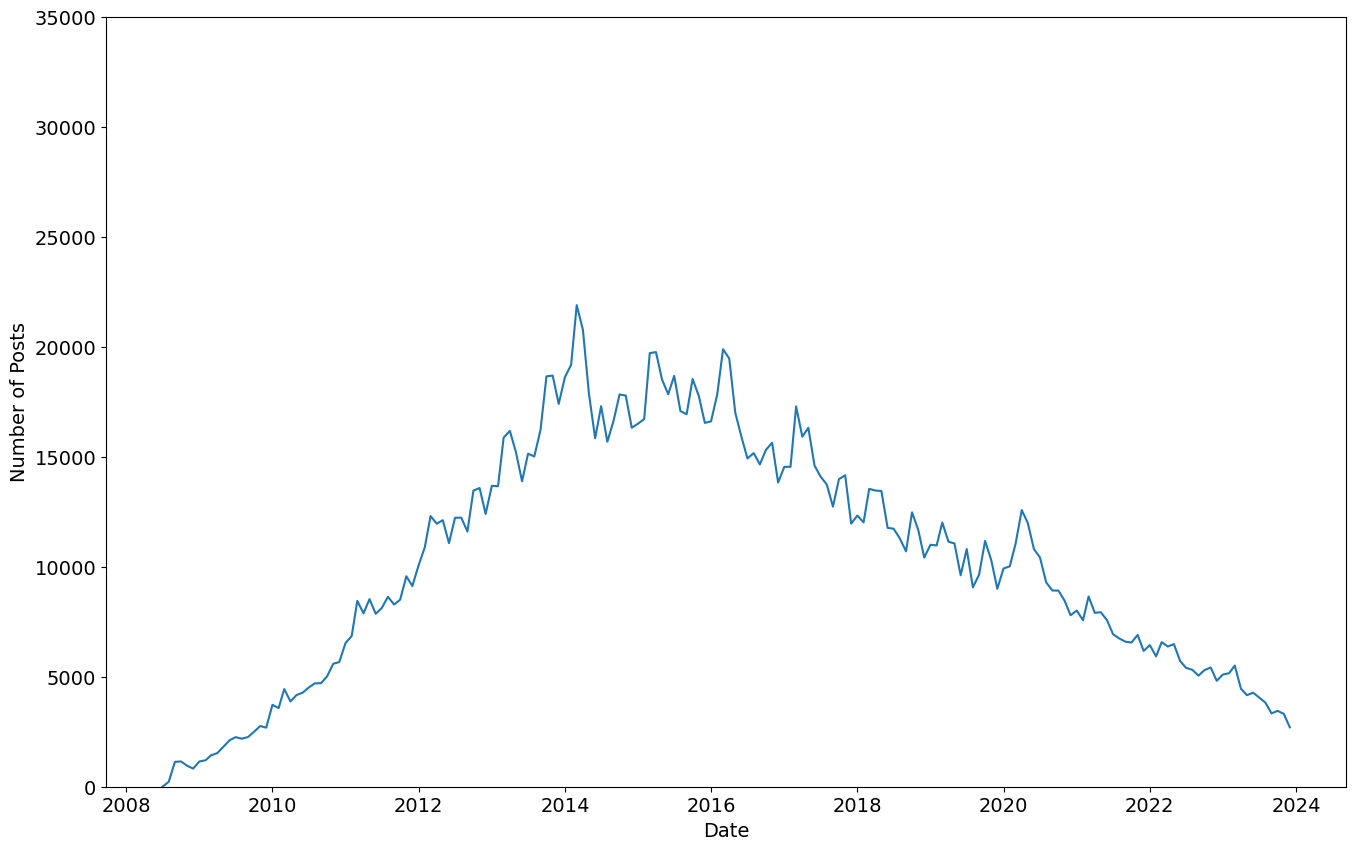

In [107]:
# Some plot configuration
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(pivoted_df.index, pivoted_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

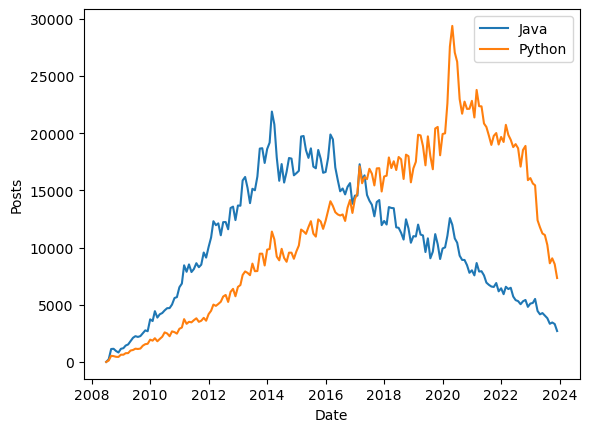

In [116]:
plt.xlabel("Date")
plt.ylabel("Posts")

plt.plot(pivoted_df.index, pivoted_df["java"], label="Java")
plt.plot(pivoted_df.index, pivoted_df["python"], label="Python")
plt.legend()

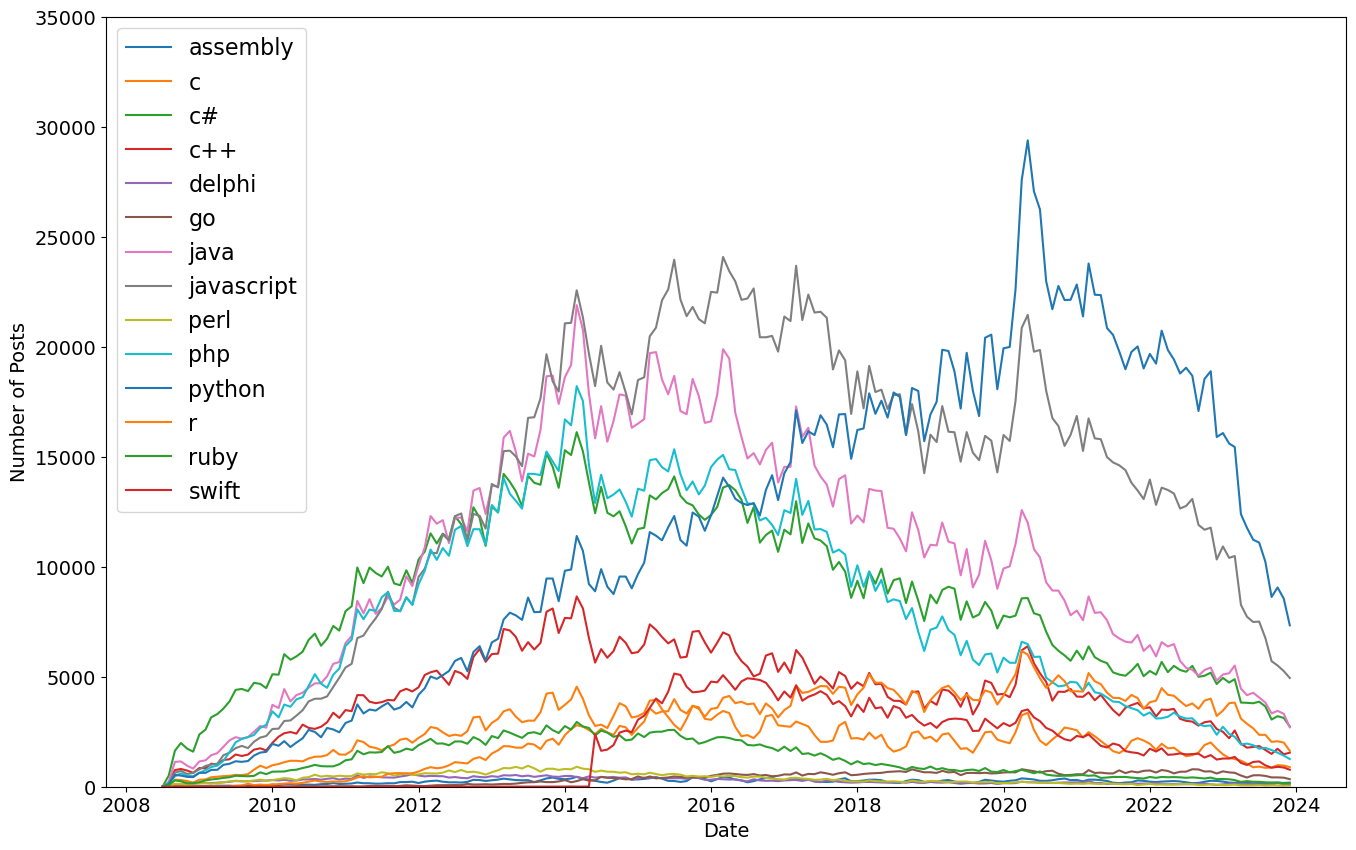

In [139]:
# Some plot configuration
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)

for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], label=column)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

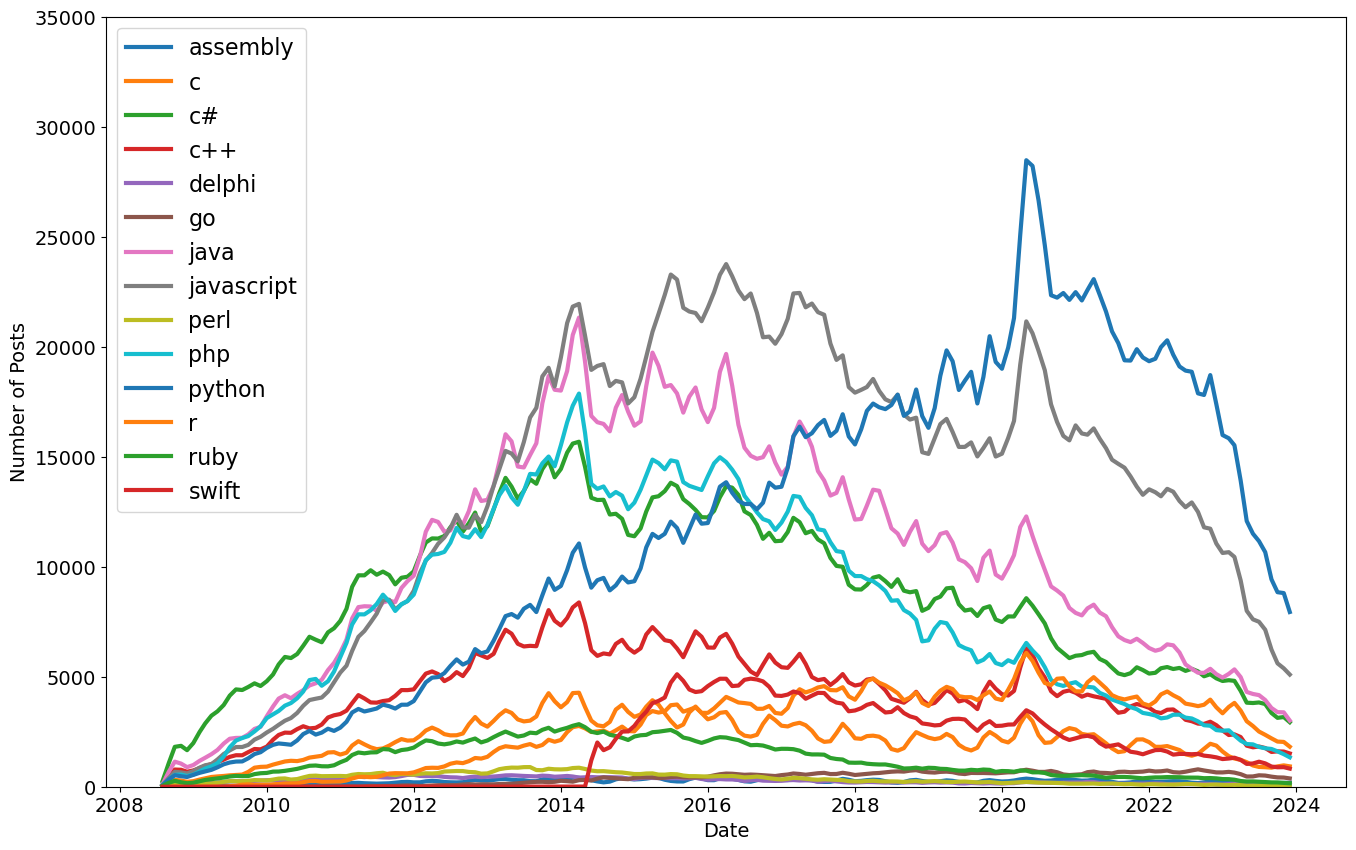

In [134]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=2).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

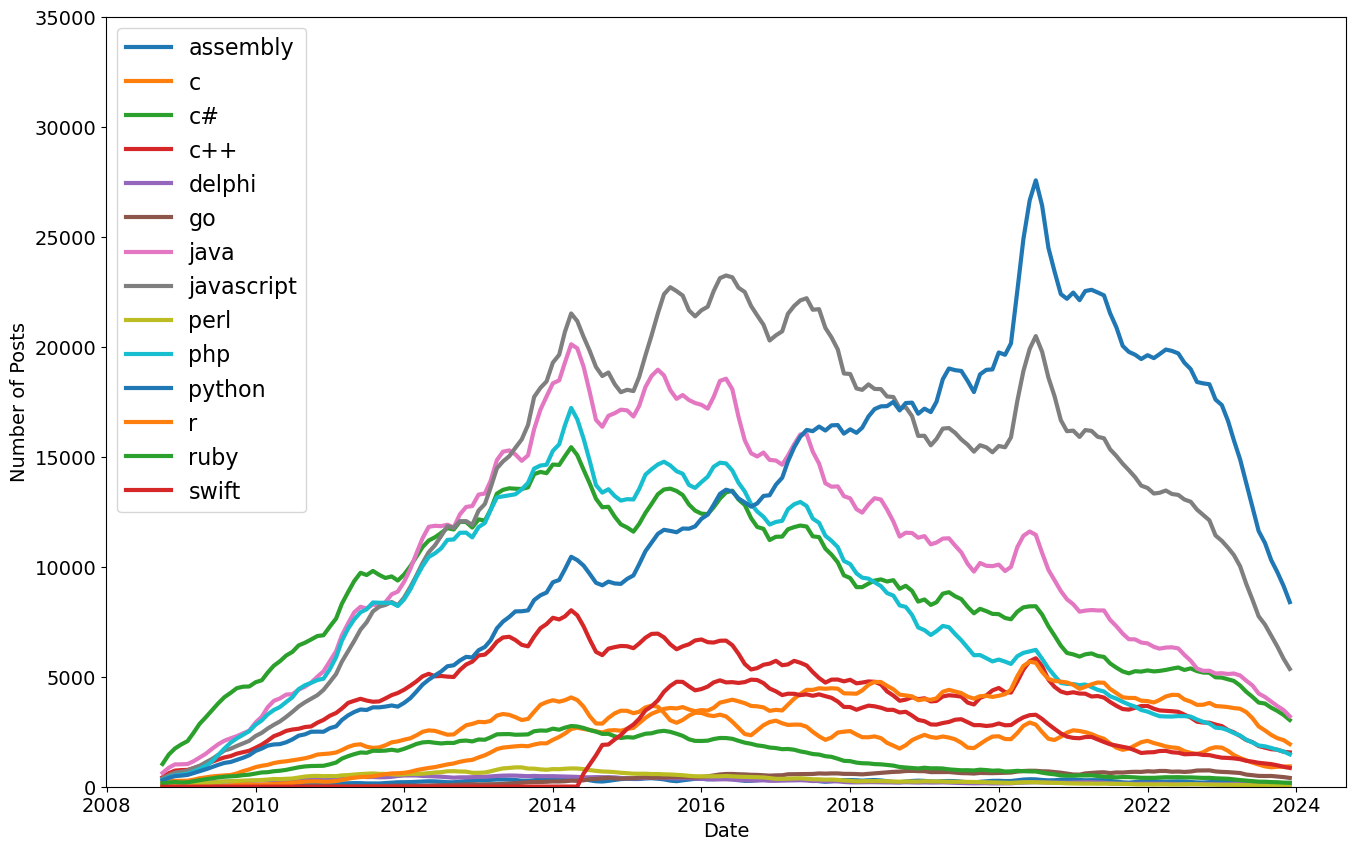

In [135]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=4).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

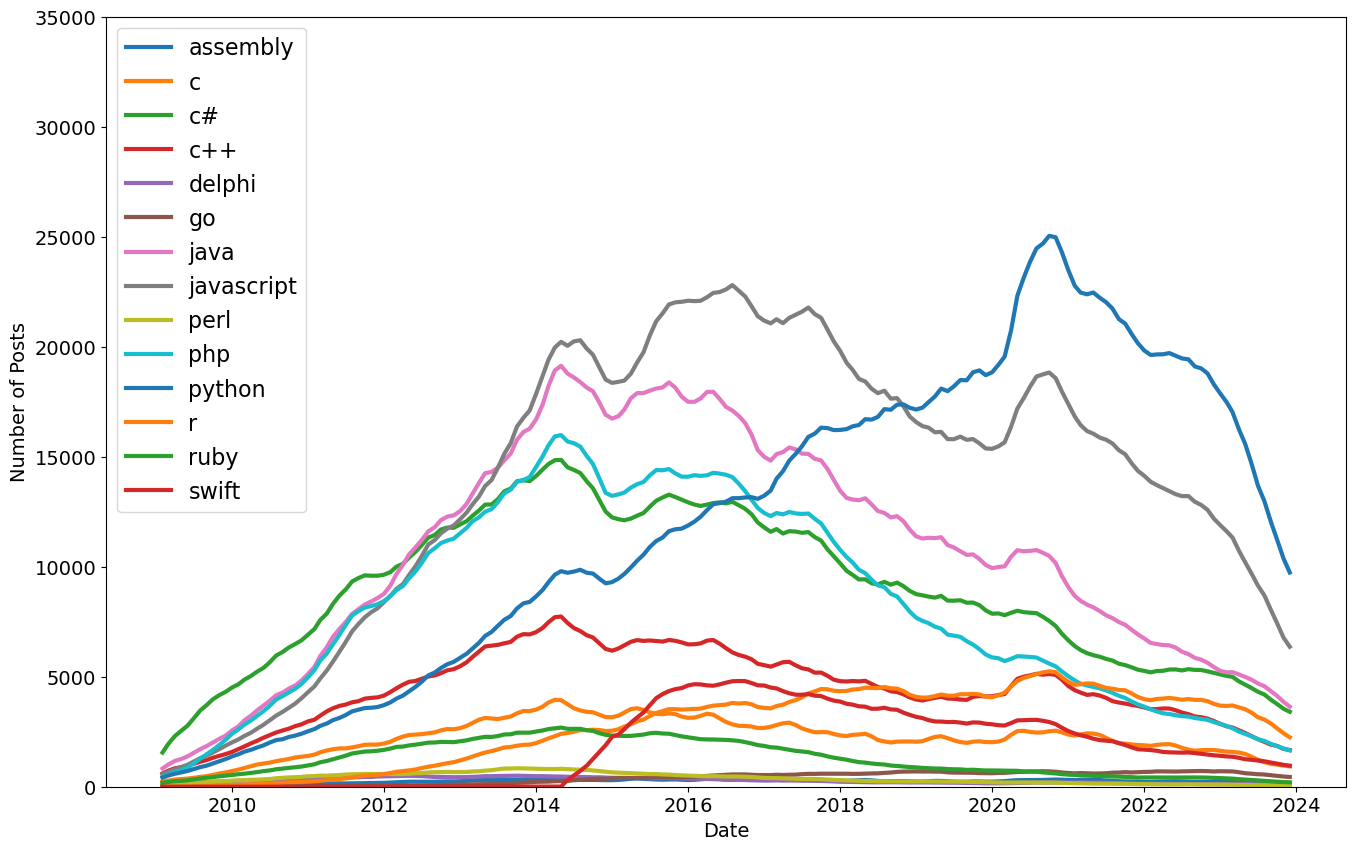

In [136]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=8).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

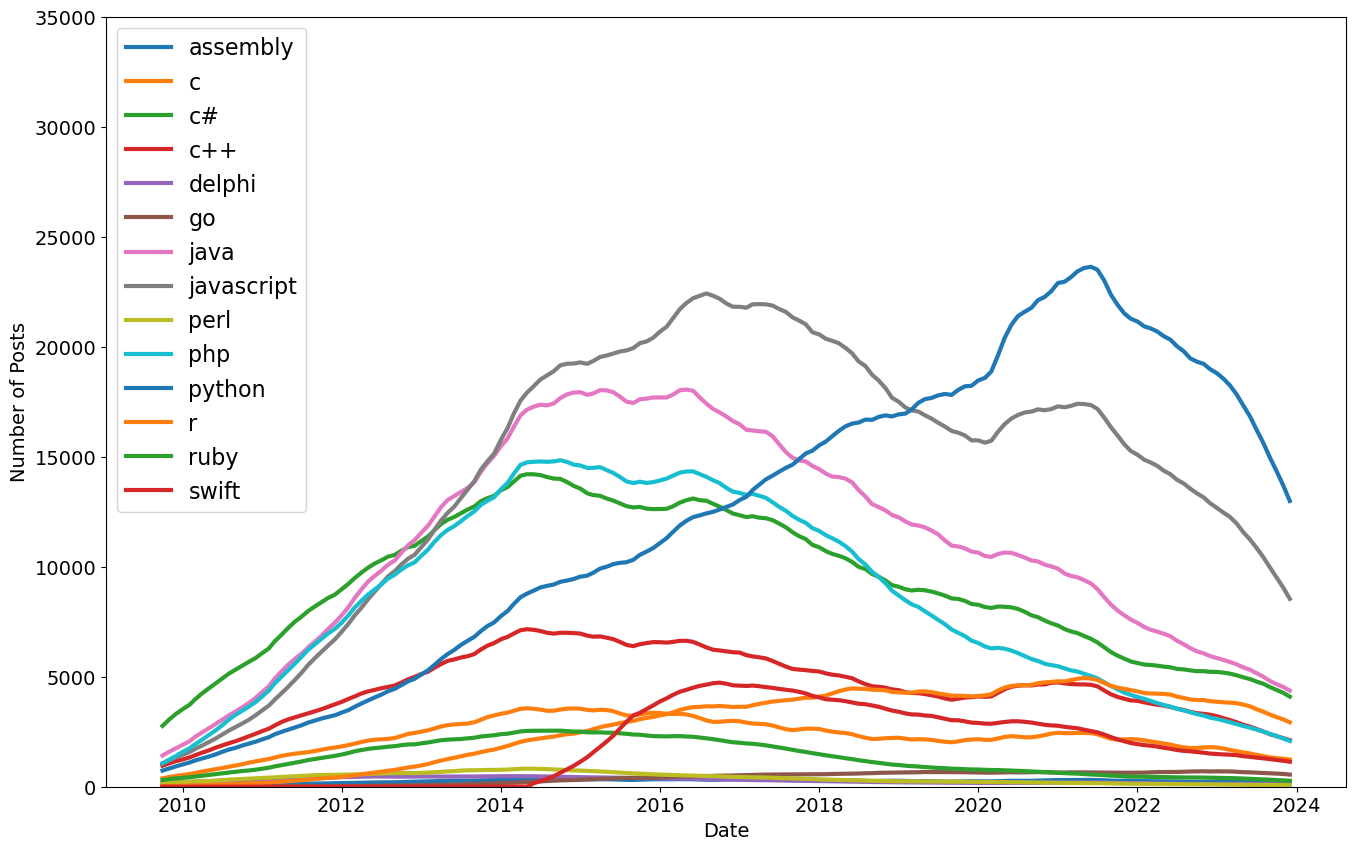

In [137]:
# The window is number of observations that are averaged
roll_df = pivoted_df.rolling(window=16).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)